In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import scipy
import geopandas as gpd
import xarray as xr
#import sparse
from itertools import product, combinations
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
#from ortools.sat.python import cp_model

pd.options.display.max_rows = 500
#pd.options.display.max_columns = 4000

import sys
sys.path.append('../src/')

from extended_survey import process_people_df, process_places_df, categorize_p, categorize_v
from census import process_census, merge_loc_agebs
from constraints import get_ind_const, get_viv_const
from misc import mun_dict, met_zone
from taz import load_marco_geo, merge_mg_taz, plot_taz_mg, plot_taz_mg_unass, plot_taz_empty_mg, plot_taz_codes, plot_chull

survey_dir = Path('../data/cuestionario_ampliado/Censo2020_CA_nl_csv/')
personas_path = Path('../data/cuestionario_ampliado/Censo2020_CA_nl_csv/Personas19.CSV')
viviendas_path = Path('../data/cuestionario_ampliado/Censo2020_CA_nl_csv/Viviendas19.CSV')
census_iter_path = Path('../data/census_loc/ITER_19CSV20.csv')
census_resageburb_path = Path('../data/census_ageb_manz/RESAGEBURB_19CSV20.csv')
output_path = Path('../output/')

In [2]:
(
    df_mun, df_loc,
    df_agebs
) = process_census(census_iter_path, census_resageburb_path)

df_loc_agebs = merge_loc_agebs(df_mun, df_loc, df_agebs, impute=True)

In [3]:
marco_geo_path = Path('../data/19_nuevoleon.gpkg')
mg = load_marco_geo(marco_geo_path, df_mun, df_loc_agebs)

taz = gpd.read_file('/Users/gperaza/Downloads/TAZ/Zonas.shp').to_crs(mg.crs).drop(columns='ESTADO')
mtaz = gpd.read_file('/Users/gperaza/Downloads/TAZ/Macrozonas.shp').to_crs(mg.crs)

In [4]:
from matplotlib.backends.backend_pdf import PdfPages
import warnings

<Axes: >

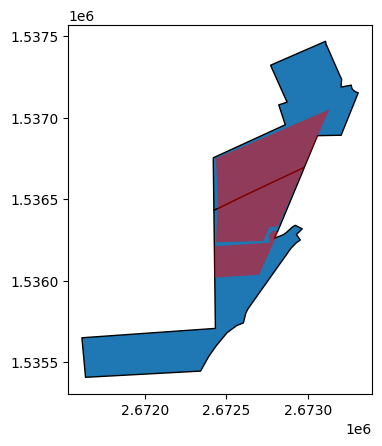

In [5]:
ax = mg[mg.intersects(taz.query("ZONA == 805").geometry.iloc[0])].plot(edgecolor='black')
taz.query("ZONA == 805").plot(ax=ax, color="red", alpha=0.5)

In [6]:
mg[mg.intersects(taz.query("ZONA == 805").geometry.iloc[0])]

CVEGEO  \
MUN              LOC AGEB                  
Salinas Victoria 551 0331  1904505510331   
                     044A  190450551044A   

                                                                    geometry  \
MUN              LOC AGEB                                                      
Salinas Victoria 551 0331  MULTIPOLYGON (((2673109.239 1537464.597, 26731...   
                     044A  MULTIPOLYGON (((2672812.648 1536302.277, 26727...   

                           POBTOT  POBFEM  POBMAS  P_0A2  P_0A2_F  P_0A2_M  \
MUN              LOC AGEB                                                    
Salinas Victoria 551 0331    4998  2489.0  2509.0  310.0    149.0    161.0   
                     044A    4566  2238.0  2328.0  320.0    166.0    154.0   

                           P_3YMAS  P_3YMAS_F  ...  PNOCUPA_M  PNOCUPA_F  \
MUN              LOC AGEB                      ...                         
Salinas Victoria 551 0331   4688.0     2340.0  ...      312.0      963.0   
                     044A   4246.0     2072.0  ...      280.0      866.0   

                           P8YM_AN  P8YM_AN_M  P8YM_AN_F  P6A14NOA  P6A14NOAF  \
MUN              LOC AGEB                                                       
Salinas Victoria 551 0331     33.0       12.0       21.0      29.0       14.0   
                     044A     23.0       12.0       11.0      28.0       16.0   

                           P6A14NOAM  POBCOL  TOTCOL  
MUN              LOC AGEB                             
Salinas Victoria 551 0331       15.0     0.0     0.0  
                     044A       12.0     0.0     0.0  

[2 rows x 232 columns]

In [9]:
taz.query("ZONA == 805")

,ID,AREA,ZONA,MUNICIPIO,MACROZONA,geometry
410,623,0.375505,805,Apodaca,72.0,"MULTIPOLYGON (((2672700.416 1536036.166, 26724..."


In [10]:
taz.query("ZONA == 63")#.plot(color="red", alpha=0.5)

,ID,AREA,ZONA,MUNICIPIO,MACROZONA,geometry
430,63,1.780855,63,Monterrey,10.0,"POLYGON ((2665253.499 1521050.342, 2665349.847..."


In [28]:
mg[mg.intersects(taz.query("MACROZONA == 63").geometry.unary_union)]

CVEGEO                                           geometry  \
MUN    LOC AGEB                                                                 
Juárez 19  0000  190310019  MULTIPOLYGON (((2688916.210 1503101.010, 26890...   
       20  0000  190310020  MULTIPOLYGON (((2688094.151 1500334.863, 26881...   
       46  0000  190310046  MULTIPOLYGON (((2688558.035 1499161.520, 26885...   
       73  0000  190310073  MULTIPOLYGON (((2690465.137 1498867.068, 26904...   
       79  0000  190310079  MULTIPOLYGON (((2687547.212 1502334.946, 26876...   
       80  0000  190310080  MULTIPOLYGON (((2684186.335 1503443.665, 26842...   
       122 0000  190310122  POLYGON ((2687579.782 1505429.308, 2687579.301...   
       196 0000  190310196  MULTIPOLYGON (((2686838.181 1505465.041, 26868...   
       244 0000  190310244  MULTIPOLYGON (((2688749.590 1505715.235, 26887...   
       257 0000  190310257  MULTIPOLYGON (((2685534.446 1503920.469, 26854...   
       318 0000  190310318  MULTIPOLYGON (((2686586.962 1506001.694, 26865...   

                 POBTOT  POBFEM  POBMAS  P_0A2  P_0A2_F  P_0A2_M  P_3YMAS  \
MUN    LOC AGEB                                                             
Juárez 19  0000      12     5.0     7.0    0.0      0.0      0.0     12.0   
       20  0000      69    32.0    37.0    5.0      2.0      3.0     64.0   
       46  0000      74    44.0    30.0    5.0      3.0      2.0     69.0   
       73  0000     165    87.0    78.0    7.0      5.0      2.0    158.0   
       79  0000     353   154.0   199.0   20.0      8.0     12.0    333.0   
       80  0000     114    58.0    56.0    3.0      1.0      2.0    111.0   
       122 0000       5     0.0     0.0    0.0      0.0      0.0      0.0   
       196 0000       9     4.0     5.0    0.0      0.0      0.0      9.0   
       244 0000      48    21.0    27.0    2.0      2.0      0.0     46.0   
       257 0000     105    49.0    56.0    3.0      1.0      2.0    102.0   
       318 0000       5     0.0     0.0    0.0      0.0      0.0      0.0   

                 P_3YMAS_F  ...  PNOCUPA_M  PNOCUPA_F  P8YM_AN  P8YM_AN_M  \
MUN    LOC AGEB             ...                                             
Juárez 19  0000        5.0  ...        2.0        4.0      1.0        1.0   
       20  0000       30.0  ...       10.0       18.0      3.0        1.0   
       46  0000       41.0  ...        3.0       18.0      2.0        1.0   
       73  0000       82.0  ...       18.0       34.0      4.0        1.0   
       79  0000      146.0  ...       28.0       52.0     19.0       12.0   
       80  0000       57.0  ...        6.0       20.0      4.0        2.0   
       122 0000        0.0  ...        0.0        0.0      0.0        0.0   
       196 0000        4.0  ...        2.0        2.0      0.0        0.0   
       244 0000       19.0  ...        3.0        5.0      0.0        0.0   
       257 0000       48.0  ...       11.0       28.0      5.0        1.0   
       318 0000        0.0  ...        0.0        0.0      0.0        0.0   

                 P8YM_AN_F  P6A14NOA  P6A14NOAF  P6A14NOAM  POBCOL  TOTCOL  
MUN    LOC AGEB                                                             
Juárez 19  0000        0.0       0.0        0.0        0.0     0.0     0.0  
       20  0000        2.0       0.0        0.0        0.0     0.0     0.0  
       46  0000        1.0       0.0        0.0        0.0     0.0     0.0  
       73  0000        3.0       1.0        0.0        1.0     0.0     0.0  
       79  0000        7.0       6.0        4.0        2.0     6.0     1.0  
       80  0000        2.0       1.0        0.0        1.0     0.0     0.0  
       122 0000        0.0       0.0        0.0        0.0     0.0     0.0  
       196 0000        0.0       0.0        0.0        0.0     0.0     0.0  
       244 0000        0.0       0.0        0.0        0.0     0.0     0.0  
       257 0000        4.0       2.0        0.0        2.0     0.0     0.0  
       318 0000        0.0       0.0  

In [21]:
gpd.__version__

'0.14.3'

In [8]:
overlay_dict = {}
taz_dict = {}
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    with PdfPages('multipage_pdf.pdf') as pdf:
        for mun in met_zone:
            taz_mun = taz[taz.MUNICIPIO == mun].copy()
            taz_dict[mun] = taz_mun.set_index('ZONA').sort_index()
            overlay = merge_mg_taz(mun, taz, mg)
            overlay_dict[mun] = overlay
            
            fig, ax = plt.subplots(2, 2, figsize=(20, 20))

            plot_taz_mg(overlay, taz_mun, title=mun, ax=ax[0, 0])
            plot_taz_mg_unass(overlay, taz_mun, title='Unassigned AGEBS', ax=ax[0, 1])
            plot_taz_empty_mg(overlay, taz_mun, title='Empty TAZs', ax=ax[1, 0])
            plot_chull(taz_mun, title='Multipol TAZs', ax=ax[1, 1])

            pdf.savefig()

            plt.close()

In [9]:
for mun, ovr in overlay_dict.items():
    taz_dict[mun] = taz_dict[mun].join(overlay_dict[mun].groupby('ZONA')[df_agebs.columns].sum().astype(int), how='outer')
    assert taz_dict[mun].index.is_unique
assert(pd.concat(taz_dict.values()).drop(-10).shape[0] == taz.dropna().shape[0]) 

In [11]:
for mun, gdf in taz_dict.items():
    gdf.to_file("taz_census.gpkg", layer=mun, driver="GPKG") 

In [7]:
taz

,ID,AREA,ZONA,MUNICIPIO,MACROZONA,geometry
0,760,4167.196770,992,NaN,NaN,"POLYGON ((2508479.996 1304784.353, 2462230.655..."
1,756,319.306458,988,NaN,NaN,"POLYGON ((2610113.988 1682423.182, 2594283.490..."
2,759,2385.943600,991,NaN,NaN,"POLYGON ((2296378.991 1548837.656, 2292191.422..."
3,762,130.859070,994,NaN,NaN,"POLYGON ((2624348.089 1559031.432, 2616993.552..."
4,758,101.798401,990,NaN,NaN,"POLYGON ((2611351.581 1503665.721, 2605663.975..."
...,...,...,...,...,...,...
761,727,4.980229,928,Pesquería,141.0,"POLYGON ((2700139.818 1521858.038, 2700048.532..."
762,728,1.030094,929,Pesquería,141.0,"POLYGON ((2702812.273 1523232.794, 2702693.361..."
763,765,89.058762,997,NaN,NaN,"POLYGON ((2694116.599 1591637.834, 2682567.863..."
764,766,791.648682,999,NaN,NaN,"POLYGON ((2810479.727 1605231.554, 2790364.705..."
